# Model Training 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score


In [33]:
df = pd.read_csv('data/stud.csv')

In [34]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [99]:
# Independent VARs
x = df.drop(columns=['math_score'], axis=1)
# Dependent VARs
y = df['math_score']

In [100]:
print(x)
print(y)

     gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  reading_score  writing_score  
0                      none             72             74  
1              

In [101]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [102]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   reading_score                1000 non-null   int64 
 6   writing_score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [103]:
x.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [104]:
for feature in x.columns:
    if(x[feature].dtype=='object'):
        print(f"(Unique {feature} :-> {x[feature].unique()})")

(Unique gender :-> ['female' 'male'])
(Unique race_ethnicity :-> ['group B' 'group C' 'group A' 'group D' 'group E'])
(Unique parental_level_of_education :-> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'])
(Unique lunch :-> ['standard' 'free/reduced'])
(Unique test_preparation_course :-> ['none' 'completed'])


In [105]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = [feature for feature in x if x[feature].dtype=='object']
print(num_features,cat_features)
# Y is a series thus it has no columns

Index(['reading_score', 'writing_score'], dtype='object') ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [106]:
# Creating Column Transformers__
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
num_transform = StandardScaler()
OHE=OneHotEncoder()
# Also Pipelining
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",OHE,cat_features),
        ("StandardScaler",num_transform,num_features),
    ]
)

In [107]:
x = preprocessor.fit_transform(x)

In [108]:
print(x.shape)

(1000, 19)


In [109]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

### 💯Evaluation_Metrics

In [110]:
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error

def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted).__round__(5)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse).__round__(5)
    r2 = r2_score(true,predicted).__round__(5)
    return mae , rmse , r2

In [111]:
##Models Import
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor  
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

# Defining Models
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNN" : KNeighborsRegressor(),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest" : RandomForestRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "SVR" : SVR(),
    "CatBoost" : CatBoostRegressor(verbose=0),
    "XGBoost" : XGBRegressor(eval_metric='rmse'),
    "AdaBoost" : AdaBoostRegressor(),
}
#This below piece of code is cool as fuck , as it is great for getting model names
model_list = [v.__class__.__name__ for v in models.values()]
print(model_list)

['LinearRegression', 'Lasso', 'Ridge', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'SVR', 'CatBoostRegressor', 'XGBRegressor', 'AdaBoostRegressor']


In [112]:
r2_score_list = []
for i in models.values():
    model = i.fit(x_train,y_train)
    y_test_pred = model.predict(x_test)
    mae, rmse, r2 = evaluate_model(y_test,y_test_pred)
    print(f"Model : {i.__class__.__name__} , MAE : {mae} , RMSE : {rmse} , R2 : {r2}")
    r2_score_list.append(r2)


Model : LinearRegression , MAE : 4.21476 , RMSE : 5.39399 , R2 : 0.88043
Model : Lasso , MAE : 5.15788 , RMSE : 6.51969 , R2 : 0.82532
Model : Ridge , MAE : 4.2111 , RMSE : 5.39039 , R2 : 0.88059


Model : KNeighborsRegressor , MAE : 5.637 , RMSE : 7.25833 , R2 : 0.7835
Model : DecisionTreeRegressor , MAE : 6.55 , RMSE : 8.21219 , R2 : 0.72286
Model : RandomForestRegressor , MAE : 4.65703 , RMSE : 5.97688 , R2 : 0.8532
Model : GradientBoostingRegressor , MAE : 4.30466 , RMSE : 5.57718 , R2 : 0.87217
Model : SVR , MAE : 5.40154 , RMSE : 8.12662 , R2 : 0.7286
Model : CatBoostRegressor , MAE : 4.61253 , RMSE : 6.00863 , R2 : 0.85163
Model : XGBRegressor , MAE : 5.05773 , RMSE : 6.47331 , R2 : 0.8278
Model : AdaBoostRegressor , MAE : 4.79445 , RMSE : 6.10268 , R2 : 0.84695


In [113]:
pd.DataFrame({
    "Model": model_list,
    "R2 Score": r2_score_list
}).sort_values(by="R2 Score", ascending=False)

# Shows Linear Regression is Best , so chose it 

,Model,R2 Score
2,Ridge,0.88059
0,LinearRegression,0.88043
6,GradientBoostingRegressor,0.87217
5,RandomForestRegressor,0.85320
8,CatBoostRegressor,0.85163
10,AdaBoostRegressor,0.84695
9,XGBRegressor,0.82780
1,Lasso,0.82532
3,KNeighborsRegressor,0.78350
7,SVR,0.72860


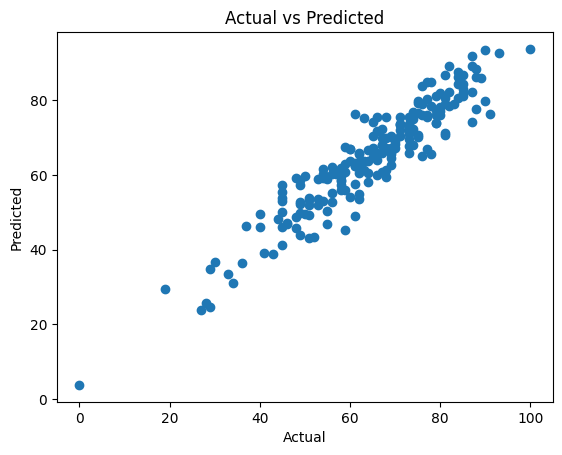

In [114]:
# Plotting
lin_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()